Calculate var(w) in runs with and without bay over the whole domain

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [2]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)

In [3]:
nx = 512
ny = 612
nz = 76
dt = 600

depth_nob = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth_nob,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,720)*600

# centers mask bathy with bay
depth_bay = ds.Depth[:]
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)

In [4]:
# Cells volume array of domain
rA_exp = np.expand_dims(ds2.rA,0)
drF_exp = np.expand_dims(np.expand_dims(ds2.drF[:],1),1)
rA_exp = rA_exp + np.zeros(ds2.hFacC[:,:,:].shape)
drF_exp = drF_exp + np.zeros(ds2.hFacC[:,:,:].shape)

In [5]:
def get_var_vol(ds, ds2, Volume_exp, tini, tend, mask, time, dt=600):
    '''mask = 3D mask'''
       
    # Calculate variance Bay
    mask_ext = np.expand_dims(mask[:,:,:],0)
    mask_ext = mask_ext + np.zeros_like(ds.variables['WVEL'][tini:tend,...])
    Wmean = np.nanmean(np.ma.masked_array(ds.variables['WVEL'][tini:tend,...],
                                          mask=mask_ext),axis=0)
    Wmean_ext = np.expand_dims(Wmean,0)
    Wmean_ext = Wmean_ext + np.zeros_like(ds.variables['WVEL'][tini:tend,...])
    
    masked_W = np.ma.masked_array(ds.variables['WVEL'][tini:tend,...],mask=mask_ext)
    var = dt*np.nansum((masked_W-Wmean_ext)**2,axis=0)/(time[tend]-time[tini])
    
    # Volume-weighted average Bay
    int_var = np.nansum(var*Volume_exp)/np.nansum(Volume_exp)
    
    # Calculate variance No Bay
    Wmean_nob = np.nanmean(np.ma.masked_array(ds2.variables['WVEL'][tini:tend,...],
                                          mask=mask_ext),axis=0)
    Wmean_nob_ext = np.expand_dims(Wmean_nob,0)
    Wmean_nob_ext = Wmean_nob_ext + np.zeros_like(ds2.variables['WVEL'][tini:tend,...])
    
    masked_W_nob = np.ma.masked_array(ds2.variables['WVEL'][tini:tend,...],mask=mask_ext)
    var_nob = dt*np.nansum((masked_W_nob-Wmean_nob_ext)**2,axis=0)/(time[tend]-time[tini])
    
    # Volume-weighted average No Bay
    int_var_nob = np.nansum(var_nob*Volume_exp)/np.nansum(Volume_exp)
    
    # Difference
    Wdif = (masked_W-Wmean_ext)-(masked_W_nob-Wmean_nob_ext)
    var_diff = dt*np.nansum((Wdif)**2,axis=0)/(time[tend]-time[tini])
    
     # Volume-weighted average difference
    int_diff = np.nansum(var_diff*Volume_exp)/np.nansum(Volume_exp)
    
    
    return(int_var, int_var_nob, int_diff)

In [6]:
tini = 0
tend = 144*1

Volume = ds2.hFacC*drF_exp*rA_exp
Volume_exp = np.expand_dims(Volume,0)
Volume_exp = Volume_exp + np.zeros_like(ds.variables['WVEL'][tini:tend,...])

int1_SVB_1d,int1_NB_1d,int1_dif_1d = get_var_vol(ds,ds2,Volume_exp, 
                                                 tini, tend, mask, time, dt=600)

In [7]:
tend = 144*2

Volume_exp = np.expand_dims(Volume,0)
Volume_exp = Volume_exp + np.zeros_like(ds.variables['WVEL'][tini:tend,...])

int1_SVB_2d,int1_NB_2d,int1_dif_2d = get_var_vol(ds,ds2,Volume_exp, tini, tend, mask, time, dt=600)

In [8]:
tend = 144*3

Volume_exp = np.expand_dims(Volume,0)
Volume_exp = Volume_exp + np.zeros_like(ds.variables['WVEL'][tini:tend,...])

int1_SVB_3d,int1_NB_3d,int1_dif_3d = get_var_vol(ds,ds2,Volume_exp, tini, tend, mask, time, dt=600)

In [ ]:
tend = 144*5-1

Volume_exp = np.expand_dims(Volume,0)
Volume_exp = Volume_exp + np.zeros_like(ds.variables['WVEL'][tini:tend,...])

int1_SVB_5d,int1_NB_5d,int1_dif_5d = get_var_vol(ds,ds2,Volume_exp, tini, tend, mask, time, dt=600)

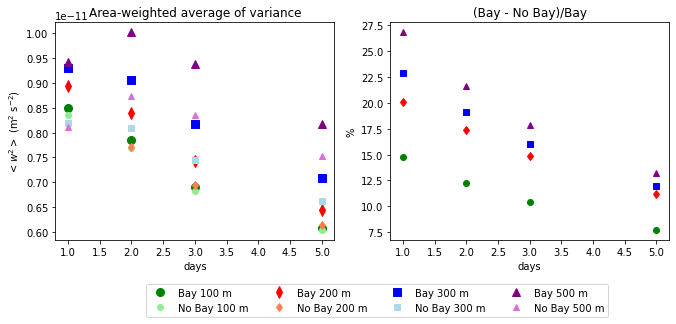

In [56]:
fig, (ax,ax1) = plt.subplots(1,2, figsize=(11,4))
ax.plot([1,2,3,5], [int1_SVB_1d, int1_SVB_2d, int1_SVB_3d, int1_SVB_5d],'go',
        markersize=8, label='Bay')
ax.plot([1,2,3,5], [int1_NB_1d, int1_NB_2d, int1_NB_3d, int1_NB_5d],'o' ,color='lightgreen', 
        label='No Bay')

ax.set_xlabel('days')
ax.set_ylabel('$<w^2>$ (m$^2$ s$^{-2}$)')
ax.set_title('Volume-weighted average of variance')
ax.legend(bbox_to_anchor=(2,-0.18), ncol=4)

ax1.plot([1,2,3,5], [100*int1_dif_1d/int1_NB_1d,100*int1_dif_2d/int1_NB_2d,100*int1_dif_3d/int1_NB_3d,100*int1_dif_5d/int1_NB_5d],'go')


ax1.set_xlabel('days')
ax1.set_title(r'(Bay - No Bay)/Bay')
ax1.set_ylabel('%')
ax1.set_title
plt.show()


In [8]:
int1_SVB_1d

2.390522737037639e-09

In [12]:
int1_NB_1d

2.3895515253480043e-09

In [10]:
int1_dif_1d

1.8457533970480754e-12

In [14]:
(int1_dif_1d/int1_NB_1d)*100

0.07724266990975504